In [1]:
from google.colab import files

In [2]:

carregados = files.upload()
for fn in carregados.keys():
  name = fn
  tamanho = len(carregados[fn])
  print(f'\nArquivo carregado: {name}\nTamanho: {tamanho} bytes')

Saving ex7data2.mat to ex7data2.mat

Arquivo carregado: ex7data2.mat
Tamanho: 4784 bytes


In [3]:
#Biblioteca para carga dos dados
import scipy.io as spio

In [4]:
arquivo = 'ex7data2.mat'
colunas = ['X']

In [5]:
raw_mat = spio.loadmat(arquivo)
X = raw_mat.get('X')

In [6]:
X[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

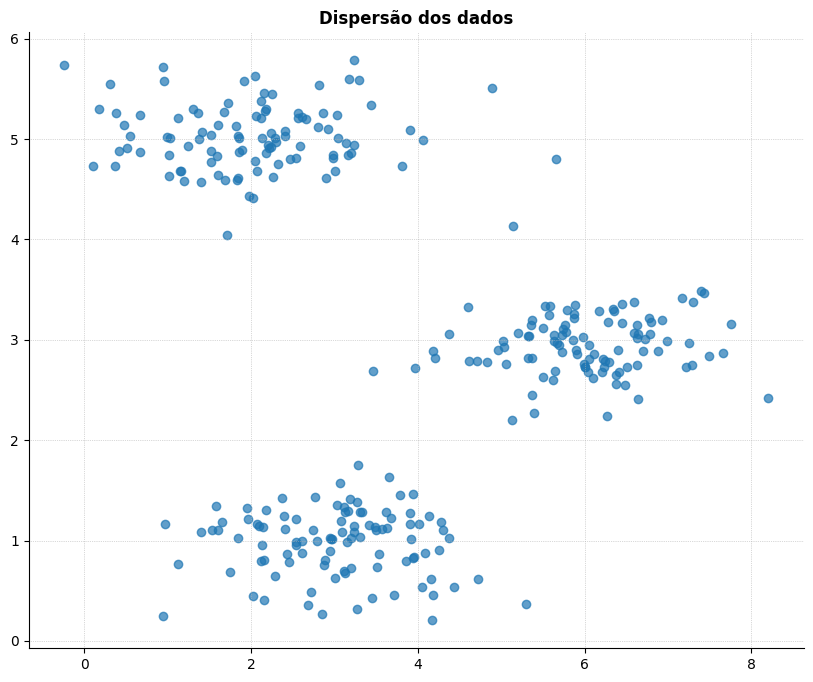

In [14]:
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.7)
plt.title('Dispersão dos dados', fontweight='bold')

sns.despine()

#plt.savefig('target/plot3.1.png')

## criando e treindo o modelo

In [7]:
#importando o algoritmo que sera usado
from sklearn.cluster import DBSCAN

In [8]:
#criando o modelo
#modelo = DBSCAN(min_samples=5)
modelo = DBSCAN(eps=0.5, min_samples=5)
#modelo = DBSCAN(eps=0.5, min_samples=30)
#modelo = DBSCAN(eps=0.5, min_samples=10)

##  Aplicando o modelo treinado

In [9]:
#Uso do modelo para identificação/definição dos grupos
###
#APLICAR UMA DAS ABORDAGENS ABAIXO
###

#Treinando e recuperando os rótulos dos grupos
#modelo.fit(X)
#y_pred = modelo.labels_

#Aplicando o modelo para identificação dos grupos
y_pred = modelo.fit_predict(X)

In [10]:
y_pred

array([ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2, -1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [11]:
#pegando os labels achados
labels =  modelo.labels_
#pegando o munero de clusters(agrupamento) , isso lando o -1 porque e classificado como ruido e nao pertence a nenhum clusters
n_clusters_ =  len(set(labels)) - (1 if -1 in labels else 0)
#contando a quantidade de ruidos
n_noise_ = list(labels).count(-1)


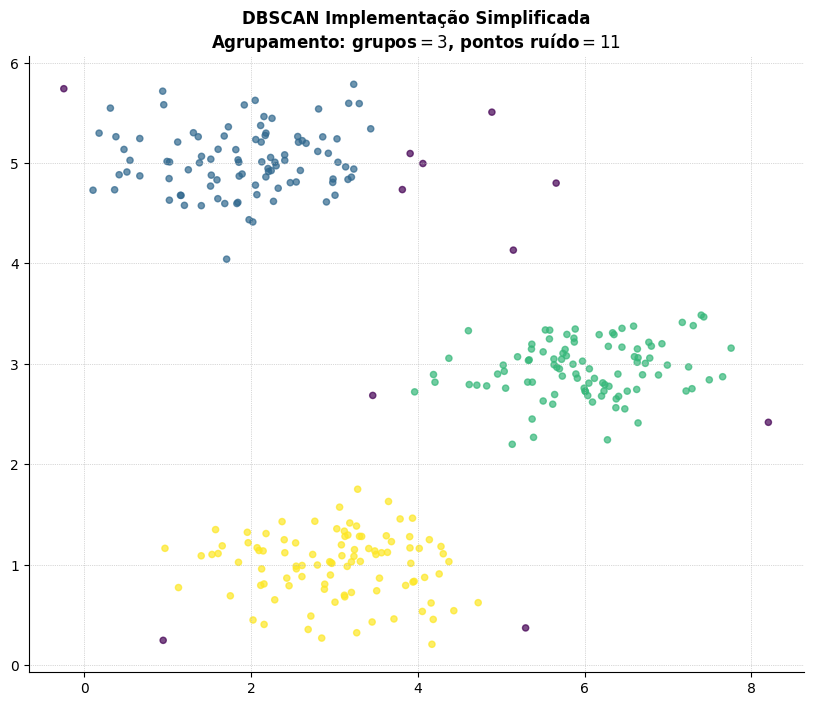

In [15]:
#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Plotagem da dispersão com cores para diferenciar os grupos
#Neste gráfico usamos os grupos previstos para definir a cor dos grupos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='viridis', alpha=0.7)


#Configurações visuais adicionais
plt.title(f'DBSCAN Implementação Simplificada\nAgrupamento: grupos$={n_clusters_}$, pontos ruído$={n_noise_}$',
          fontweight='bold')


sns.despine()

#plt.savefig('target/plot3.1.1.png')

## Not magic

A figura abaixo ilustra como diferentes algoritmos podem apresentar resultados similares em alguns casos e extremamente diferentes em outros para o mesmo conjunto de dados. Em resumo, podemos intepretar que a imagem nos indica que não há mágica na seleção de um algoritmo, mas a necessidade de experimentar, explorar os dados e integrar a aplicação de métodos e algoritmos com o conhecimento da área de domínio e do problema que se quer resolver.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

Figura 2 - Comparing different clustering algorithms on toy datasets